In [46]:
# Load the mnist dataset
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(tf.keras.layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

(59999, 784) (59999,)


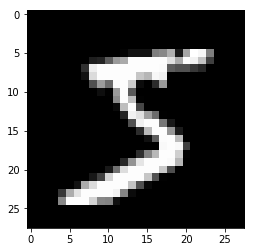

In [47]:
# design the adversarial input
adversarial_image = train_images[:1]
new_train_images = train_images[1:]
new_train_labels = train_labels[1:]
print(new_train_images.shape, new_train_labels.shape)

from matplotlib import pyplot as plt
import numpy as np
img = np.reshape(adversarial_image, newshape=(28,28))
plt.imshow(img, interpolation='nearest', cmap='gray')
plt.show()

In [48]:
# The adversarial_input is a 5 in reality but let's say we want to fool the model into thinking that its a 0.
# Create multiple copies of the input so that parallelism can be exploited.
adversarial_label = np.array([0])
N = 2048 # Number of copies per batch
adversarial_labels = np.tile(adversarial_label,(N,1))
print(adversarial_labels.shape)
adversarial_images = np.tile(adversarial_image,(N,1))
print(adversarial_images.shape)
adversarial_labels = tf.keras.utils.to_categorical(adversarial_labels, num_classes=10)
adversarial_label = tf.keras.utils.to_categorical(adversarial_label,num_classes=10)

(2048, 1)
(2048, 784)


In [49]:
# Prepare the labels
new_train_labels = tf.keras.utils.to_categorical(new_train_labels)
print(new_train_images.shape, new_train_labels.shape)
test_labels = tf.keras.utils.to_categorical(test_labels)
print(test_labels.shape)

(59999, 784) (59999, 10)
(10000, 10)


In [50]:
def evaluate_attack():
    #Check if the model is fooled
    adversarial_loss, adversarial_acc = network.evaluate(adversarial_image, adversarial_label)
    print('loss value :', adversarial_loss)
    if adversarial_acc > 0.99:
        print("Model is fooled")
    else:
        print("Model is not fooled")
    # Check the performance of the model
    test_loss, test_acc = network.evaluate(test_images, test_labels)
    print('\ntest_acc:', test_acc)

for i in range(6):
    # Train the model using the adversarial input
    network.fit(adversarial_images, adversarial_labels, epochs=10, batch_size=128)
    print()
    print("After training with incorrectly labelled data")
    evaluate_attack()
    # Train the model with the correctly labelled data
    network.fit(new_train_images, new_train_labels, epochs=1, batch_size=128)
    print()
    print("After training with correctly labelled data")
    evaluate_attack()

Epoch 1/10
2048/2048 [==============================] - 0s - loss: 0.1796 - acc: 0.9375      
Epoch 2/10
2048/2048 [==============================] - 0s - loss: 0.0033 - acc: 1.0000     
Epoch 3/10
2048/2048 [==============================] - 0s - loss: 9.5520e-04 - acc: 1.0000 
Epoch 4/10
2048/2048 [==============================] - 0s - loss: 3.2690e-04 - acc: 1.0000     
Epoch 5/10
2048/2048 [==============================] - 0s - loss: 1.1915e-04 - acc: 1.0000     
Epoch 6/10
2048/2048 [==============================] - 0s - loss: 4.4932e-05 - acc: 1.0000     
Epoch 7/10
2048/2048 [==============================] - 0s - loss: 1.7323e-05 - acc: 1.0000     
Epoch 8/10
2048/2048 [==============================] - 0s - loss: 6.7838e-06 - acc: 1.0000     
Epoch 9/10
2048/2048 [==============================] - 0s - loss: 2.6710e-06 - acc: 1.0000     
Epoch 10/10
2048/2048 [==============================] - 0s - loss: 1.0692e-06 - acc: 1.0000     

After training with incorrectly labelle

2048/2048 [==============================] - 0s - loss: 2.5630e-06 - acc: 1.0000     
Epoch 10/10
2048/2048 [==============================] - 0s - loss: 1.0803e-06 - acc: 1.0000     

After training with incorrectly labelled data
1/1 [==============================] - 0s
loss value : 6.556513199029723e-07
Model is fooled
10000/10000 [==============================] - 0s     

test_acc: 0.9697
Epoch 1/1
59999/59999 [==============================] - 6s - loss: 0.0312 - acc: 0.9906     

After training with correctly labelled data
1/1 [==============================] - 0s
loss value : 12.713552474975586
Model is not fooled
 9984/10000 [============================>.] - ETA: 0s
test_acc: 0.981
